In [ ]:
# data preparation for training

In [3]:
import pandas as pd
from sklearn.model_selection import KFold
# import pickle
# from tcrpeg.TCRpeg import TCRpeg

In [ ]:
# from BA we have train, validation and test. 
# merge train and validation 


In [4]:
# first for allele. 
# Select columns, merge train, test and validation, crate 5 folds from which 4 are for gnn training and one for testing.
paths_allele = ["data_for_training/splitted_datasets/allele/beta/train.tsv", 
                "data_for_training/splitted_datasets/allele/beta/validation.tsv"] #,
               # "data_for_training/splitted_datasets/allele/beta/test.tsv"]
allele_dfs = [pd.read_csv(path, sep='\t') for path in paths_allele]  # Load all files into a list of DataFrames
concatenated_df = pd.concat(allele_dfs, ignore_index=True)  # Concatenate them into a single DataFrame
df = concatenated_df[['TRB_CDR3', 'Epitope', 'Binding']] # keep just what is needed

columns_to_rename = {
    'TRB_CDR3': 'CDR3.beta',
    'Binding': 'Label'
}
df.rename(columns=columns_to_rename, inplace=True)
print('Satarting length= ', len(df))
df = df[df['CDR3.beta'].apply(len) <= 30] 
print('Length after removing CDR3.beta len > 30 = ', len(df))
df = df[df['Epitope'].apply(len) <= 30] 
print('Length after removing Epitope len > 30 = ', len(df))

# 5. Generate 5 folds for cross-validation and save them in 'processed_data'
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Loop through each fold and save it as a separate file
for fold, (_, fold_index) in enumerate(kf.split(df)):
    fold_data = df.iloc[fold_index]
    path_save_fold = f"processed_data/PA_all/allele_fold_{fold}.csv"
    fold_data.to_csv(path_save_fold, index=False)  # Saves each fold
    print(f"Saved fold {fold} as allele_fold_{fold}.csv in {path_save_fold}")


/tmp/ipykernel_28611/2002924324.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=columns_to_rename, inplace=True)


Satarting length=  338783
Length after removing CDR3.beta len > 30 =  338769
Length after removing Epitope len > 30 =  335115
Saved fold 0 as allele_fold_0.csv in processed_data/PA_all/allele_fold_0.csv
Saved fold 1 as allele_fold_1.csv in processed_data/PA_all/allele_fold_1.csv
Saved fold 2 as allele_fold_2.csv in processed_data/PA_all/allele_fold_2.csv
Saved fold 3 as allele_fold_3.csv in processed_data/PA_all/allele_fold_3.csv
Saved fold 4 as allele_fold_4.csv in processed_data/PA_all/allele_fold_4.csv


In [3]:
# ...and here for 'gene'
# Select columns, merge train, test and validation, crate 5 folds from which 4 are for gnn training and one for testing.
paths_allele = ["data_for_training/splitted_datasets/gene/beta/train.tsv", 
                "data_for_training/splitted_datasets/gene/beta/validation.tsv"] #,
               # "data_for_training/splitted_datasets/gene/beta/test.tsv"]
allele_dfs = [pd.read_csv(path, sep='\t') for path in paths_allele]  # Load all files into a list of DataFrames
concatenated_df = pd.concat(allele_dfs, ignore_index=True)  # Concatenate them into a single DataFrame
df = concatenated_df[['TRB_CDR3', 'Epitope', 'Binding']] # keep just what is needed

columns_to_rename = {
    'TRB_CDR3': 'CDR3.beta',
    'Binding': 'Label'
}
df.rename(columns=columns_to_rename, inplace=True)
print('Satarting length= ', len(df))
df = df[df['CDR3.beta'].apply(len) <= 30] 
print('Length after removing CDR3.beta len > 30 = ', len(df))
df = df[df['Epitope'].apply(len) <= 30] 
print('Length after removing Epitope len > 30 = ', len(df))

# 5. Generate 5 folds for cross-validation and save them in 'processed_data'
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Loop through each fold and save it as a separate file
for fold, (_, fold_index) in enumerate(kf.split(df)):
    fold_data = df.iloc[fold_index]
    path_save_fold = f"processed_data/PA_all/gene_fold_{fold}.csv"
    fold_data.to_csv(path_save_fold, index=False)  # Saves each fold
    print(f"Saved fold {fold} as gene_fold_{fold}.csv in {path_save_fold}")

/tmp/ipykernel_26998/836007490.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=columns_to_rename, inplace=True)


Satarting length=  305545
Length after removing CDR3.beta len > 30 =  305537
Length after removing Epitope len > 30 =  301932
Saved fold 0 as gene_fold_0.csv in processed_data/PA_all/gene_fold_0.csv
Saved fold 1 as gene_fold_1.csv in processed_data/PA_all/gene_fold_1.csv
Saved fold 2 as gene_fold_2.csv in processed_data/PA_all/gene_fold_2.csv
Saved fold 3 as gene_fold_3.csv in processed_data/PA_all/gene_fold_3.csv
Saved fold 4 as gene_fold_4.csv in processed_data/PA_all/gene_fold_4.csv


In [5]:
# Datan hochladen auf wandb...  

# Done! :)

import wandb
import os

from dotenv import load_dotenv, find_dotenv
load_dotenv()

#/home/ubuntu/PA-Cancer-Immunotherapy/GNN/processed_data/PA_all
# upload paired data
path_to_data = './processed_data/PA_all' # path zu unseren Daten
precisions = ["allele", "gene"]

for precision in precisions:
    
    main_project_name = f"dataset-{precision}_GNN" # das erscheint auf wandb projects 
    
    for i in range(5):
        dataset_name = f'{precision}_fold_{i}.csv'
        #main_project_name = os.getenv("MAIN_PROJECT_NAME")
        print(f"uploading dataset to {main_project_name}")
        run = wandb.init(project=main_project_name, job_type="Upload Dataset", entity="pa_cancerimmunotherapy")
        artifact = wandb.Artifact(name=dataset_name, type="dataset")
        artifact.add_dir(path_to_data, name=precision)
        run.log_artifact(artifact)
        wandb.finish()

# %run ./data_scripts/upload_datasets.ipynb

uploading dataset to dataset-allele_GNN


wandb: Adding directory to artifact (./processed_data/PA_all)... Done. 0.0s


uploading dataset to dataset-allele_GNN


wandb: Adding directory to artifact (./processed_data/PA_all)... Done. 0.0s


uploading dataset to dataset-allele_GNN


wandb: Adding directory to artifact (./processed_data/PA_all)... Done. 0.0s


uploading dataset to dataset-allele_GNN


wandb: Adding directory to artifact (./processed_data/PA_all)... Done. 0.0s


uploading dataset to dataset-allele_GNN


wandb: Adding directory to artifact (./processed_data/PA_all)... Done. 0.0s


uploading dataset to dataset-gene_GNN


wandb: Adding directory to artifact (./processed_data/PA_all)... Done. 0.0s


uploading dataset to dataset-gene_GNN


wandb: Adding directory to artifact (./processed_data/PA_all)... Done. 0.0s


uploading dataset to dataset-gene_GNN


wandb: Adding directory to artifact (./processed_data/PA_all)... Done. 0.0s


uploading dataset to dataset-gene_GNN


wandb: Adding directory to artifact (./processed_data/PA_all)... Done. 0.0s


uploading dataset to dataset-gene_GNN


wandb: Adding directory to artifact (./processed_data/PA_all)... Done. 0.0s


In [1]:
# train with PA_all  # this was the run with allele

! python train_pa.py --gpu 0 --configs_path configs/PA_all.yml --droup_out 0.1 --split StrictTCR

Epoch: 1/100, Loss: 0.6913798, Train Acc: 0.4829, Test Acc: 0.5480, Train AUC: 0.4659, Train APUR: 0.4715, Test AUC: 0.5670, Test AUPR: 0.5589
Epoch: 2/100, Loss: 0.6908738, Train Acc: 0.5373, Test Acc: 0.5447, Train AUC: 0.5493, Train APUR: 0.5332, Test AUC: 0.5716, Test AUPR: 0.5640
Epoch: 3/100, Loss: 0.6907544, Train Acc: 0.5370, Test Acc: 0.5445, Train AUC: 0.5531, Train APUR: 0.5445, Test AUC: 0.5730, Test AUPR: 0.5645
Epoch: 4/100, Loss: 0.6903147, Train Acc: 0.5432, Test Acc: 0.5435, Train AUC: 0.5621, Train APUR: 0.5493, Test AUC: 0.5734, Test AUPR: 0.5651
Epoch: 5/100, Loss: 0.6897598, Train Acc: 0.5446, Test Acc: 0.5431, Train AUC: 0.5641, Train APUR: 0.5535, Test AUC: 0.5736, Test AUPR: 0.5658
Epoch: 6/100, Loss: 0.6894188, Train Acc: 0.5451, Test Acc: 0.5438, Train AUC: 0.5625, Train APUR: 0.5523, Test AUC: 0.5738, Test AUPR: 0.5663
Epoch: 7/100, Loss: 0.6884170, Train Acc: 0.5451, Test Acc: 0.5438, Train AUC: 0.5714, Train APUR: 0.5612, Test AUC: 0.5737, Test AUPR: 0.5664

In [2]:
# train with PA_all_gene 
# new in this run: in the train_pa file:  without "args.w_aucloss * aucm_loss.to(device)" ; without "pos_weight=pos_weight"

! python train_pa.py --gpu 0 --configs_path configs/PA_all_gene.yml --droup_out 0.1 --split StrictTCR

Epoch: 1/100, Loss: 0.6930730, Train Acc: 0.5085, Test Acc: 0.5160, Train AUC: 0.5068, Train APUR: 0.5043, Test AUC: 0.5850, Test AUPR: 0.5800
Epoch: 2/100, Loss: 0.6909082, Train Acc: 0.5075, Test Acc: 0.5532, Train AUC: 0.5672, Train APUR: 0.5582, Test AUC: 0.5862, Test AUPR: 0.5833
Epoch: 3/100, Loss: 0.6868373, Train Acc: 0.5432, Test Acc: 0.5519, Train AUC: 0.5729, Train APUR: 0.5675, Test AUC: 0.5898, Test AUPR: 0.5846
Epoch: 4/100, Loss: 0.6838281, Train Acc: 0.5514, Test Acc: 0.5633, Train AUC: 0.5828, Train APUR: 0.5747, Test AUC: 0.5927, Test AUPR: 0.5862
Epoch: 5/100, Loss: 0.6821342, Train Acc: 0.5621, Test Acc: 0.5646, Train AUC: 0.5890, Train APUR: 0.5791, Test AUC: 0.5954, Test AUPR: 0.5881
Epoch: 6/100, Loss: 0.6814213, Train Acc: 0.5656, Test Acc: 0.5708, Train AUC: 0.5923, Train APUR: 0.5813, Test AUC: 0.6011, Test AUPR: 0.5920
Epoch: 7/100, Loss: 0.6792936, Train Acc: 0.5726, Test Acc: 0.5761, Train AUC: 0.6008, Train APUR: 0.5855, Test AUC: 0.6087, Test AUPR: 0.5946

In [1]:
# train with PA_all_gene 
# new in this run: in the train_pa file:  without "args.w_aucloss * aucm_loss.to(device)" ; without "pos_weight=pos_weight"
# AND: using embeddings created with tcrpeg trained with both cdr3 and epitope

! python train_pa.py --gpu 0 --configs_path configs/PA_all_gene.yml --droup_out 0.1 --split StrictTCR

Epoch: 1/100, Loss: 0.6932896, Train Acc: 0.5012, Test Acc: 0.5542, Train AUC: 0.5008, Train APUR: 0.5013, Test AUC: 0.5835, Test AUPR: 0.5811
Epoch: 2/100, Loss: 0.6891400, Train Acc: 0.5461, Test Acc: 0.5518, Train AUC: 0.5601, Train APUR: 0.5539, Test AUC: 0.5932, Test AUPR: 0.5925
Epoch: 3/100, Loss: 0.6866821, Train Acc: 0.5408, Test Acc: 0.5612, Train AUC: 0.5790, Train APUR: 0.5714, Test AUC: 0.5946, Test AUPR: 0.5931
Epoch: 4/100, Loss: 0.6837597, Train Acc: 0.5545, Test Acc: 0.5675, Train AUC: 0.5889, Train APUR: 0.5832, Test AUC: 0.5994, Test AUPR: 0.5972
Epoch: 5/100, Loss: 0.6804011, Train Acc: 0.5688, Test Acc: 0.5689, Train AUC: 0.5954, Train APUR: 0.5917, Test AUC: 0.6023, Test AUPR: 0.5991
Epoch: 6/100, Loss: 0.6791258, Train Acc: 0.5719, Test Acc: 0.5746, Train AUC: 0.5971, Train APUR: 0.5888, Test AUC: 0.6058, Test AUPR: 0.6030
Epoch: 7/100, Loss: 0.6775180, Train Acc: 0.5759, Test Acc: 0.5784, Train AUC: 0.6032, Train APUR: 0.5935, Test AUC: 0.6101, Test AUPR: 0.6031

In [ ]:
# to compare with...from below:
# Test Acc: 0.6460, Test AUC: 0.7038, Test AUPR: 0.6919

In [1]:
# train with PA_all_allele 
# new in this run: in the train_pa file:  without "args.w_aucloss * aucm_loss.to(device)" ; without "pos_weight=pos_weight"
# AND: using embeddings created with tcrpeg trained with both cdr3 and epitope

! python train_pa.py --gpu 0 --configs_path configs/PA_all_allele.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_allele.yml', split='StrictTCR', dataset='pMTnet')
Epoch: 1/100, Loss: 0.6936490, Train Acc: 0.5003, Test Acc: 0.5047, Train AUC: 0.5014, Train APUR: 0.5045, Test AUC: 0.5942, Test AUPR: 0.5897
Epoch: 2/100, Loss: 0.6930482, Train Acc: 0.5018, Test Acc: 0.5682, Train AUC: 0.5731, Train APUR: 0.5626, Test AUC: 0.5949, Test AUPR: 0.5931
Epoch: 3/100, Loss: 0.6888506, Train Acc: 0.5586, Test Acc: 0.5560, Train AUC: 0.5841, Train APUR: 0.5764, Test AUC: 0.5983, Test AUPR: 0.5955
Epoch: 4/100, Loss: 0.6863489, Train Acc: 0.5540, Test Acc: 0.5697, Train AUC: 0.5931, Train APUR: 0.5806, Test AUC: 0.6006, Test AUPR: 0.5959
Epoch: 5/100, Loss: 0.6823230, Train Acc: 0.5705, Test Acc: 0.5709, Train AUC: 0.6006, Train APUR: 0.5914, Test AUC: 0.6013, Test AUPR: 0.59

In [1]:
# this is the same code line as above, but the embeddings used are without training of the trcpeg model. 
# Result: training the tcrpeg model delivers better results!!!

! python train_pa.py --gpu 0 --configs_path configs/PA_all_allele.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_allele.yml', split='StrictTCR', dataset='pMTnet')
models/PA_all/allele_embeddings.pkl
['allele_fold_0.csv', 'allele_fold_1.csv', 'allele_fold_2.csv', 'allele_fold_3.csv']
['allele_fold_4.csv']
Epoch: 1/100, Loss: 0.6931294, Train Acc: 0.5021, Test Acc: 0.5409, Train AUC: 0.5067, Train APUR: 0.5076, Test AUC: 0.5641, Test AUPR: 0.5554
Epoch: 2/100, Loss: 0.6927062, Train Acc: 0.5423, Test Acc: 0.5432, Train AUC: 0.5587, Train APUR: 0.5369, Test AUC: 0.5704, Test AUPR: 0.5625
Epoch: 3/100, Loss: 0.6924415, Train Acc: 0.5393, Test Acc: 0.5428, Train AUC: 0.5640, Train APUR: 0.5497, Test AUC: 0.5708, Test AUPR: 0.5616
Epoch: 4/100, Loss: 0.6919569, Train Acc: 0.5442, Test Acc: 0.5424, Train AUC: 0.5672, Train APUR: 0.5496, Test AUC: 0.5701, Test AUPR: 0.56

In [2]:
# the same as above, but checking the paths!

! python train_pa.py --gpu 0 --configs_path configs/PA_all_allele.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_allele.yml', split='StrictTCR', dataset='pMTnet')
models/PA_all/allele_embeddings.pkl
['allele_fold_0.csv', 'allele_fold_1.csv', 'allele_fold_2.csv', 'allele_fold_3.csv']
['allele_fold_4.csv']
^C


In [3]:
# train with PA_all_allele 
# new in this run: in the train_pa file:  without "args.w_aucloss * aucm_loss.to(device)" ; without "pos_weight=pos_weight"
# AND: using embeddings with just created_model tcrpeg, no training 

! python train_pa.py --gpu 0 --configs_path configs/PA_all_allele.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_allele.yml', split='StrictTCR', dataset='pMTnet')
models/PA_all/allele_embeddings.pkl
['allele_fold_0.csv', 'allele_fold_1.csv', 'allele_fold_2.csv', 'allele_fold_3.csv']
['allele_fold_4.csv']
Epoch: 1/100, Loss: 0.6931294, Train Acc: 0.5021, Test Acc: 0.5409, Train AUC: 0.5067, Train APUR: 0.5076, Test AUC: 0.5641, Test AUPR: 0.5554
Epoch: 2/100, Loss: 0.6927062, Train Acc: 0.5423, Test Acc: 0.5432, Train AUC: 0.5587, Train APUR: 0.5369, Test AUC: 0.5704, Test AUPR: 0.5625
Epoch: 3/100, Loss: 0.6924415, Train Acc: 0.5393, Test Acc: 0.5428, Train AUC: 0.5640, Train APUR: 0.5497, Test AUC: 0.5708, Test AUPR: 0.5616
Epoch: 4/100, Loss: 0.6919569, Train Acc: 0.5442, Test Acc: 0.5424, Train AUC: 0.5672, Train APUR: 0.5496, Test AUC: 0.5701, Test AUPR: 0.56

In [4]:
# train with PA_all_gene 
# new in this run: in the train_pa file:  without "args.w_aucloss * aucm_loss.to(device)" ; without "pos_weight=pos_weight"
# AND: using embeddings with just created_model tcrpeg, no training 

! python train_pa.py --gpu 0 --configs_path configs/PA_all_gene.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_gene.yml', split='StrictTCR', dataset='pMTnet')
models/PA_all/gene_embeddings.pkl
['gene_fold_0.csv', 'gene_fold_1.csv', 'gene_fold_2.csv', 'gene_fold_3.csv']
['gene_fold_4.csv']
Epoch: 1/100, Loss: 0.6931685, Train Acc: 0.5008, Test Acc: 0.5366, Train AUC: 0.5002, Train APUR: 0.5043, Test AUC: 0.5745, Test AUPR: 0.5689
Epoch: 2/100, Loss: 0.6928357, Train Acc: 0.5223, Test Acc: 0.5430, Train AUC: 0.5470, Train APUR: 0.5356, Test AUC: 0.5765, Test AUPR: 0.5694
Epoch: 3/100, Loss: 0.6925907, Train Acc: 0.5344, Test Acc: 0.5462, Train AUC: 0.5503, Train APUR: 0.5325, Test AUC: 0.5770, Test AUPR: 0.5674
Epoch: 4/100, Loss: 0.6921002, Train Acc: 0.5452, Test Acc: 0.5468, Train AUC: 0.5662, Train APUR: 0.5501, Test AUC: 0.5768, Test AUPR: 0.5664
Epoch: 5/10

In [2]:
# Next experiment:
# generate embeddings with the trained tcrpeg model, but separately for cdr3 and for epitope. 
# In fact I can one training for cdr3 of both allele and gen and another training for epitopes.
# This will be done in the embeddings_gnn file and run the model here:

! python train_pa.py --gpu 0 --configs_path configs/PA_all_gene.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_gene.yml', split='StrictTCR', dataset='pMTnet')
embeddings_path:   models/PA_all/gene_and_allele_embeddings.pkl
train_file_list:   ['gene_fold_0.csv', 'gene_fold_1.csv', 'gene_fold_2.csv', 'gene_fold_3.csv']
test_file_list:   ['gene_fold_4.csv']
Epoch: 1/100, Loss: 0.6931127, Train Acc: 0.5071, Test Acc: 0.5335, Train AUC: 0.5063, Train APUR: 0.5050, Test AUC: 0.5882, Test AUPR: 0.5800
Epoch: 2/100, Loss: 0.6904224, Train Acc: 0.5185, Test Acc: 0.5525, Train AUC: 0.5700, Train APUR: 0.5530, Test AUC: 0.5915, Test AUPR: 0.5869
Epoch: 3/100, Loss: 0.6880704, Train Acc: 0.5456, Test Acc: 0.5722, Train AUC: 0.5836, Train APUR: 0.5736, Test AUC: 0.5976, Test AUPR: 0.5934
Epoch: 4/100, Loss: 0.6837313, Train Acc: 0.5707, Test Acc: 0.5686, Train AUC: 0.5914, 

In [1]:
# Running the above but double epochs:
# generate embeddings with the trained tcrpeg model, but separately for cdr3 and for epitope. 
# epochs 200
! python train_pa.py --gpu 0 --configs_path configs/PA_all_gene.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=200, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_gene.yml', split='StrictTCR', dataset='pMTnet')
embeddings_path:   models/PA_all/gene_and_allele_embeddings.pkl
train_file_list:   ['gene_fold_0.csv', 'gene_fold_1.csv', 'gene_fold_2.csv', 'gene_fold_3.csv']
test_file_list:   ['gene_fold_4.csv']
Epoch: 1/200, Loss: 0.6931127, Train Acc: 0.5071, Test Acc: 0.5335, Train AUC: 0.5063, Train APUR: 0.5050, Test AUC: 0.5882, Test AUPR: 0.5800
Epoch: 2/200, Loss: 0.6904224, Train Acc: 0.5185, Test Acc: 0.5525, Train AUC: 0.5700, Train APUR: 0.5530, Test AUC: 0.5915, Test AUPR: 0.5869
Epoch: 3/200, Loss: 0.6880704, Train Acc: 0.5456, Test Acc: 0.5722, Train AUC: 0.5836, Train APUR: 0.5736, Test AUC: 0.5976, Test AUPR: 0.5934
Epoch: 4/200, Loss: 0.6837314, Train Acc: 0.5707, Test Acc: 0.5686, Train AUC: 0.5914, 

In [2]:
# embeddings with the trained tcrpeg model separately for cdr3 and for epitope. 
# This is the first try with wandb
! python train_pa.py --gpu 0 --configs_path configs/PA_all_gene.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-gene_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241203_234127-htr152ra
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run scarlet-dust-8
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-gene_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-gene_GNN/runs/htr152ra
wandb:   10 of 10 files downloaded.  
wandb:  

In [3]:
# embeddings with the trained tcrpeg model separately for cdr3 and for epitope. 
# first time for allele in wandb
! python train_pa.py --gpu 0 --configs_path configs/PA_all_allele.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_allele.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-allele_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241203_235623-etp47d99
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run peachy-yogurt-7
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-allele_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-allele_GNN/runs/etp47d99
wandb:   10 of 10 files downloaded.  

In [1]:
# embeddings with the trained tcrpeg model separately for cdr3 and for epitope. 

# The embeddings were just generated again, since it was not sure if the tes.tsv file was used for the first embeddings file. 
# This is the second try with wandb for gene

! python train_pa.py --gpu 0 --configs_path configs/PA_all_gene.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-gene_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241205_095353-1xsrmsof
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run zany-donkey-9
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-gene_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-gene_GNN/runs/1xsrmsof
wandb:   10 of 10 files downloaded.  
wandb:   

In [2]:
# embeddings with the trained tcrpeg model separately for cdr3 and for epitope. 
# # The embeddings were just generated again, since it was not sure if the tes.tsv file was used for the first embeddings file. 
# second time for allele in wandb
! python train_pa.py --gpu 0 --configs_path configs/PA_all_allele.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_allele.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-allele_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241205_100337-2od3vm7l
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run giddy-leaf-10
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-allele_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-allele_GNN/runs/2od3vm7l
wandb:   10 of 10 files downloaded.  
w

In [ ]:
# PROJECT: ONE_MODEL

In [4]:
# first: data preparation for project 'one_model'

#training a gnn with all 'BA-data', where train and validation are used for training und test for testing

import pandas as pd

ppl_path = "./data_for_training/splitted_datasets/"
precisions = ["allele", "gene"]
for precision in precisions:
    train = f"{ppl_path}{precision}/beta/train.tsv"
    valid = f"{ppl_path}{precision}/beta/validation.tsv"
    test = f"{ppl_path}{precision}/beta/test.tsv"
    train_dfs = [pd.read_csv(train, sep='\t'), pd.read_csv(valid, sep='\t')]
    concat_train_df = pd.concat(train_dfs, ignore_index=True)
    concat_train_df = concat_train_df[['TRB_CDR3', 'Epitope', 'Binding']]
    test_df = pd.read_csv(test, sep='\t')
    test_df = test_df[['TRB_CDR3', 'Epitope', 'Binding']]

    columns_to_rename = {'TRB_CDR3': 'CDR3.beta','Binding': 'Label'}
    concat_train_df.rename(columns=columns_to_rename, inplace=True)
    test_df.rename(columns=columns_to_rename, inplace=True)
    concat_train_df = concat_train_df[concat_train_df['CDR3.beta'].apply(len) <= 30]
    concat_train_df = concat_train_df[concat_train_df['Epitope'].apply(len) <= 30]
    test_df = test_df[test_df['CDR3.beta'].apply(len) <= 30]
    test_df = test_df[test_df['Epitope'].apply(len) <= 30]
    save_path_train = f"./processed_data/PA_all_one/{precision}_train.csv"
    save_path_test = f"./processed_data/PA_all_one/{precision}_test.csv"
    concat_train_df.to_csv(save_path_train, index=False)
    print(f"Saved: {save_path_train}")
    test_df.to_csv(save_path_test, index=False)
    print(f"Saved: {save_path_test}")

Saved: ./processed_data/PA_all_one/allele_train.csv
Saved: ./processed_data/PA_all_one/allele_test.csv
Saved: ./processed_data/PA_all_one/gene_train.csv
Saved: ./processed_data/PA_all_one/gene_test.csv


In [5]:
# Datan hochladen auf wandb

import wandb
import os

from dotenv import load_dotenv, find_dotenv
load_dotenv()

#/home/ubuntu/PA-Cancer-Immunotherapy/GNN/processed_data/PA_all
# upload paired data
path_to_data = './processed_data/PA_all_one/' # path zu unseren Daten
precisions = ["allele", "gene"]

for precision in precisions:
    
    main_project_name = f"dataset-all-one-{precision}_GNN" # das erscheint auf wandb projects 
    

    datasets_names = ['train.csv', 'test.csv']
    for dataset_name in datasets_names:
        #main_project_name = os.getenv("MAIN_PROJECT_NAME")
        print(f"uploading dataset to {main_project_name}")
        run = wandb.init(project=main_project_name, job_type="Upload Dataset", entity="pa_cancerimmunotherapy")
        artifact = wandb.Artifact(name=dataset_name, type="dataset")
        artifact.add_dir(path_to_data, name=f"{precision}_")
        run.log_artifact(artifact)
wandb.finish()

# %run ./data_scripts/upload_datasets.ipynb

uploading dataset to dataset-all-one-allele_GNN


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin


wandb: Adding directory to artifact (./processed_data/PA_all_one)... Done. 0.1s


uploading dataset to dataset-all-one-allele_GNN


wandb: Adding directory to artifact (./processed_data/PA_all_one)... Done. 0.0s


uploading dataset to dataset-all-one-gene_GNN


wandb: Adding directory to artifact (./processed_data/PA_all_one)... Done. 0.0s


uploading dataset to dataset-all-one-gene_GNN


wandb: Adding directory to artifact (./processed_data/PA_all_one)... Done. 0.0s


In [8]:
# first for allele

! python train_pa_all_one.py --gpu 0 --configs_path configs/PA_all_one_allele.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_one_allele.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-one-allele_GNN
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241206_013248-3154au9d
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run jumping-planet-5
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-one-allele_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-one-allele_GNN/runs/3154au9d
wandb:   4 of 4 files downloaded.  
wandb:   4 of 4 files downloaded.  
embeddings_path:   models/PA_all/gene_and_allel

In [9]:
# and for gene:

! python train_pa_all_one.py --gpu 0 --configs_path configs/PA_all_one_gene.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_one_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-one-allele_GNN
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241206_014005-rl5m7xfr
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run exalted-wave-6
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-one-allele_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-one-allele_GNN/runs/rl5m7xfr
wandb:   4 of 4 files downloaded.  
wandb:   4 of 4 files downloaded.  
embeddings_path:   models/PA_all/gene_and_allele_em

In [ ]:
# =========================================================================================================================
# PROJECT: TVT TRAIN-VALIDATION-TEST

In [ ]:
# This might be the project I should have done from the begining...
# The train, validation and test data from BA will be used as train validation test data for the gnn

In [3]:
# just added 'task' for TTP (17.12.)

import pandas as pd

ppl_path = "./data_for_training/splitted_datasets/"
precisions = ["allele", "gene"]
for precision in precisions:
    train = f"{ppl_path}{precision}/beta/train.tsv"
    valid = f"{ppl_path}{precision}/beta/validation.tsv"
    test = f"{ppl_path}{precision}/beta/test.tsv"
    train_df = pd.read_csv(train, sep='\t')
    train_df = train_df[['TRB_CDR3', 'Epitope', 'Binding']]
    valid_df = pd.read_csv(valid, sep='\t')
    valid_df = valid_df[['TRB_CDR3', 'Epitope', 'Binding']]
    test_df = pd.read_csv(test, sep='\t')
    test_df = test_df[['TRB_CDR3', 'Epitope', 'Binding','task']]

    columns_to_rename = {'TRB_CDR3': 'CDR3.beta','Binding': 'Label'}
    train_df.rename(columns=columns_to_rename, inplace=True)
    valid_df.rename(columns=columns_to_rename, inplace=True)
    test_df.rename(columns=columns_to_rename, inplace=True)
    train_df = train_df[train_df['CDR3.beta'].apply(len) <= 30]
    train_df = train_df[train_df['Epitope'].apply(len) <= 30]
    valid_df = valid_df[valid_df['CDR3.beta'].apply(len) <= 30]
    valid_df = valid_df[valid_df['Epitope'].apply(len) <= 30]
    test_df = test_df[test_df['CDR3.beta'].apply(len) <= 30]
    test_df = test_df[test_df['Epitope'].apply(len) <= 30]
    save_path_train = f"./processed_data/PA_all_tvt/{precision}_train.csv"
    save_path_valid = f"./processed_data/PA_all_tvt/{precision}_validation.csv"
    save_path_test = f"./processed_data/PA_all_tvt/{precision}_test.csv"
    train_df.to_csv(save_path_train, index=False)
    print(f"Saved: {save_path_train}")
    valid_df.to_csv(save_path_valid, index=False)
    print(f"Saved: {save_path_valid}")
    test_df.to_csv(save_path_test, index=False)
    print(f"Saved: {save_path_test}")

Saved: ./processed_data/PA_all_tvt/allele_train.csv
Saved: ./processed_data/PA_all_tvt/allele_validation.csv
Saved: ./processed_data/PA_all_tvt/allele_test.csv
Saved: ./processed_data/PA_all_tvt/gene_train.csv
Saved: ./processed_data/PA_all_tvt/gene_validation.csv
Saved: ./processed_data/PA_all_tvt/gene_test.csv


In [1]:
# Datan hochladen auf wandb

import wandb
import os

from dotenv import load_dotenv, find_dotenv
load_dotenv()

#/home/ubuntu/PA-Cancer-Immunotherapy/GNN/processed_data/PA_all
# upload paired data
path_to_data = './processed_data/PA_all_tvt/' # path zu unseren Daten
precisions = ["allele", "gene"]

for precision in precisions:
    
    main_project_name = f"dataset-all-tvt-{precision}_GNN" # das erscheint auf wandb projects 
    

    datasets_names = ['train.csv', 'validation.csv', 'test.csv']
    for dataset_name in datasets_names:
        #main_project_name = os.getenv("MAIN_PROJECT_NAME")
        print(f"uploading dataset to {main_project_name}")
        run = wandb.init(project=main_project_name, job_type="Upload Dataset", entity="pa_cancerimmunotherapy")
        artifact = wandb.Artifact(name=dataset_name, type="dataset")
        artifact.add_dir(path_to_data, name=f"{precision}_")
        run.log_artifact(artifact)
wandb.finish()


uploading dataset to dataset-all-tvt-allele_GNN


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin


wandb: Adding directory to artifact (./processed_data/PA_all_tvt)... Done. 0.0s


uploading dataset to dataset-all-tvt-allele_GNN


wandb: Adding directory to artifact (./processed_data/PA_all_tvt)... Done. 0.0s


uploading dataset to dataset-all-tvt-allele_GNN


wandb: Adding directory to artifact (./processed_data/PA_all_tvt)... Done. 0.0s


uploading dataset to dataset-all-tvt-gene_GNN


wandb: Adding directory to artifact (./processed_data/PA_all_tvt)... Done. 0.0s


uploading dataset to dataset-all-tvt-gene_GNN


wandb: Adding directory to artifact (./processed_data/PA_all_tvt)... Done. 0.0s


uploading dataset to dataset-all-tvt-gene_GNN


wandb: Adding directory to artifact (./processed_data/PA_all_tvt)... Done. 0.0s


In [4]:
# first for allele (using only the adam optimizer)(pos_weight=1 = not used, since balanced datasets)

! python train_pa_all_tvt.py --gpu 0 --configs_path configs/PA_all_tvt_allele.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_allele.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-allele_GNN
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241206_210112-1vgj835w
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run crisp-sound-5
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-allele_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-allele_GNN/runs/1vgj835w
wandb:   6 of 6 files downloaded.  
wandb:   6 of 6 files downloaded.  
wandb:   6 of 6 files downloaded.  
embeddings_pat

In [5]:
# for gene  (using only the adam optimizer)(pos_weight=1 = not used, since balanced datasets)

! python train_pa_all_tvt.py --gpu 0 --configs_path configs/PA_all_tvt_gene.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-gene_GNN
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241206_213812-k5nznux9
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run grateful-lion-4
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-gene_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-gene_GNN/runs/k5nznux9
wandb:   6 of 6 files downloaded.  
wandb:   6 of 6 files downloaded.  
wandb:   6 of 6 files downloaded.  
embeddings_path:   m

In [2]:
# new calculation AP and AUC for TTP and compare global metrics to check correct code.
# allele

! python train_pa_all_tvt.py --gpu 0 --configs_path configs/PA_all_tvt_allele.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_allele.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-allele_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241217_120820-j92tngw2
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run dauntless-sponge-14
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-allele_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-allele_GNN/runs/j92tngw2
wandb

In [3]:
# new calculation AP and AUC for TTP and compare global metrics to check correct code.
# gene

! python train_pa_all_tvt.py --gpu 0 --configs_path configs/PA_all_tvt_gene.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-gene_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241217_122309-erlsy45d
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run visionary-frog-10
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-gene_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-gene_GNN/runs/erlsy45d
wandb:   6 of 6

In [ ]:
# --------------------------------------------------------------------------------------------------

In [1]:
# Training using both optimizers (pos_weight=1 = not used, since balanced datasets)
# first for allele

! python train_pa_all_tvt.py --gpu 0 --configs_path configs/PA_all_tvt_allele.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_allele.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-allele_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241213_160714-ut01k0ej
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run swept-rain-10
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-allele_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-allele_GNN/runs/ut01k0ej
wandb:   6 

In [2]:
# for gene  (using both optimizers)

! python train_pa_all_tvt.py --gpu 0 --configs_path configs/PA_all_tvt_gene.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-gene_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241213_165119-dkl081o4
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run copper-planet-9
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-gene_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-gene_GNN/runs/dkl081o4
wandb:   6 of 6 f

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------

In [2]:
# allele. Mit confusion Matrix

! python train_pa_all_tvt.py --gpu 0 --configs_path configs/PA_all_tvt_allele.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_allele.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-allele_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241206_234252-1o6tyk92
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run golden-meadow-6
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-allele_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-allele_GNN/runs/1o6tyk92
wandb:   

In [1]:
# for gene. Mit confusion Matrix 

! python train_pa_all_tvt.py --gpu 0 --configs_path configs/PA_all_tvt_gene.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-gene_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241206_231404-sq6ngple
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run dry-sponge-6
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-gene_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-gene_GNN/runs/sq6ngple
wandb:   6 of 6 file

In [ ]:
# --------------------------------------------------------------------------------------------------------------------------

In [3]:
# allele. mit lr = 0.01

! python train_pa_all_tvt.py --gpu 0 --configs_path configs/PA_all_tvt_allele.yml --droup_out 0.1 --lr 0.01 --split StrictTCR
# Rasults: bad. lr=0.01 does not help

Namespace(gpu=0, lr=0.01, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_allele.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-allele_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241209_120454-k8vnt1db
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run blooming-glitter-9
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-allele_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-allele_GNN/runs/k8vnt1db
wandb: 

In [4]:
# for gene. Since lr = 0.01 was bad for allele. Let's try here 0.0005

! python train_pa_all_tvt.py --gpu 0 --configs_path configs/PA_all_tvt_gene.yml --droup_out 0.1 --lr 0.0005 --split StrictTCR
# Result: also not better than lr=0.001

Namespace(gpu=0, lr=0.0005, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-gene_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241209_121629-1tr6uyot
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run iconic-paper-8
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-gene_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-gene_GNN/runs/1tr6uyot
wandb:   6 of 6 f

In [ ]:
# ------------------------------------------------------------------------------------------------------------------------

In [1]:
# allele. (Mit confusion Matrix) and AP (which actually is the same as the AUPC before)
# drop_out = 0.2

! python train_pa_all_tvt.py --gpu 0 --configs_path configs/PA_all_tvt_allele.yml --droup_out 0.2 --split StrictTCR
# Result: not better than drop_out 0.1

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.2, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_allele.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-allele_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241209_113305-po13d66f
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run glad-terrain-8
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-allele_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-allele_GNN/runs/po13d66f
wandb:   6

In [2]:
# for gene. (Mit confusion Matrix) and AP
# drop_out = 0.2
! python train_pa_all_tvt.py --gpu 0 --configs_path configs/PA_all_tvt_gene.yml --droup_out 0.2 --split StrictTCR
# Result: not better than drop_out 0.1

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.2, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-gene_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241209_113947-i2anecei
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run volcanic-puddle-7
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-gene_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-gene_GNN/runs/i2anecei
wandb:   6 of 6

In [ ]:
# =========================================================================================================================

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [ ]:
# training the gnn with 10_x datasets

In [2]:
from tcrpeg.TCRpeg import TCRpeg
import pandas as pd

In [3]:

def remove_unmapped(df_2b_cleaned):
        
    df_train = df_2b_cleaned['CDR3.beta'].values
    
    #create the TCRpeg class
    model = TCRpeg(hidden_size=256, num_layers = 3, load_data=True, embedding_path='./pa_embeddings/TCRpeg/tcrpeg/data/embedding_32.txt', path_train=df_train)
    #create the TCRpeg model. 
    model.create_model()
    
    # remove unmapped characters in CDR3.beta column
    unique_chars_beta = set(''.join(df_2b_cleaned['CDR3.beta']))
    unmapped_chars_beta = [ch for ch in unique_chars_beta if ch not in model.aa2idx]
    print("Unmapped characters in beta:", unmapped_chars_beta)
    
    # Create a regex pattern to match any of these characters
    pattern = f"[{''.join(unmapped_chars_beta)}]"
    
    # Remove rows with any of the unmapped characters in 'CDR3.beta' column
    df = df_2b_cleaned[~df_2b_cleaned['CDR3.beta'].str.contains(pattern)]
    print('Length after removing unmapped chars in CDR3.beta= ', len(df))
    return df

In [4]:
# version 17.12.
import pandas as pd

ppl_path = "./data_for_training/splitted_datasets/"
precisions = ["allele", "gene"]
for precision in precisions:
    train = f"{ppl_path}{precision}/beta/train_10x.tsv"
    valid = f"{ppl_path}{precision}/beta/validation_10x.tsv"
    test = f"{ppl_path}{precision}/beta/test_10x.tsv"
    train_df = pd.read_csv(train, sep='\t')
    train_df = train_df[['TRB_CDR3', 'Epitope', 'Binding']]
    valid_df = pd.read_csv(valid, sep='\t')
    valid_df = valid_df[['TRB_CDR3', 'Epitope', 'Binding']]
    test_df = pd.read_csv(test, sep='\t')
    test_df = test_df[['TRB_CDR3', 'Epitope', 'Binding', 'task']]

    columns_to_rename = {'TRB_CDR3': 'CDR3.beta','Binding': 'Label'}
    train_df.rename(columns=columns_to_rename, inplace=True)
    valid_df.rename(columns=columns_to_rename, inplace=True)
    test_df.rename(columns=columns_to_rename, inplace=True)
    train_df = train_df[train_df['CDR3.beta'].apply(len) <= 30]
    train_df = train_df[train_df['Epitope'].apply(len) <= 30]
    valid_df = valid_df[valid_df['CDR3.beta'].apply(len) <= 30]
    valid_df = valid_df[valid_df['Epitope'].apply(len) <= 30]
    test_df = test_df[test_df['CDR3.beta'].apply(len) <= 30]
    test_df = test_df[test_df['Epitope'].apply(len) <= 30]
    train_df = remove_unmapped(train_df)
    test_df = remove_unmapped(test_df)
    valid_df = remove_unmapped(valid_df)
    save_path_train = f"./processed_data/PA_all_tvt_10x/{precision}_train.csv"
    save_path_valid = f"./processed_data/PA_all_tvt_10x/{precision}_validation.csv"
    save_path_test = f"./processed_data/PA_all_tvt_10x/{precision}_test.csv"
    train_df.to_csv(save_path_train, index=False)
    print(f"Saved: {save_path_train}")
    valid_df.to_csv(save_path_valid, index=False)
    print(f"Saved: {save_path_valid}")
    test_df.to_csv(save_path_test, index=False)
    print(f"Saved: {save_path_test}")


Have loaded the data, total training seqs : 276241
Unmapped characters in beta: ['*']
Length after removing unmapped chars in CDR3.beta=  275950
Have loaded the data, total training seqs : 174966
Unmapped characters in beta: ['*']
Length after removing unmapped chars in CDR3.beta=  174149
Have loaded the data, total training seqs : 174764
Unmapped characters in beta: ['*']
Length after removing unmapped chars in CDR3.beta=  173910
Saved: ./processed_data/PA_all_tvt_10x/allele_train.csv
Saved: ./processed_data/PA_all_tvt_10x/allele_validation.csv
Saved: ./processed_data/PA_all_tvt_10x/allele_test.csv
Have loaded the data, total training seqs : 249305
Unmapped characters in beta: ['*']
Length after removing unmapped chars in CDR3.beta=  248760
Have loaded the data, total training seqs : 158214
Unmapped characters in beta: ['*']
Length after removing unmapped chars in CDR3.beta=  157288
Have loaded the data, total training seqs : 158196
Unmapped characters in beta: ['*']
Length after remo

In [5]:
# as used before

import pandas as pd

ppl_path = "./data_for_training/splitted_datasets/"
precisions = ["allele", "gene"]
for precision in precisions:
    train = f"{ppl_path}{precision}/beta/train_10x.tsv"
    valid = f"{ppl_path}{precision}/beta/validation_10x.tsv"
    test = f"{ppl_path}{precision}/beta/test_10x.tsv"
    train_df = pd.read_csv(train, sep='\t')
    train_df = train_df[['TRB_CDR3', 'Epitope', 'Binding']]
    valid_df = pd.read_csv(valid, sep='\t')
    valid_df = valid_df[['TRB_CDR3', 'Epitope', 'Binding']]
    test_df = pd.read_csv(test, sep='\t')
    test_df = test_df[['TRB_CDR3', 'Epitope', 'Binding']]

    columns_to_rename = {'TRB_CDR3': 'CDR3.beta','Binding': 'Label'}
    train_df.rename(columns=columns_to_rename, inplace=True)
    valid_df.rename(columns=columns_to_rename, inplace=True)
    test_df.rename(columns=columns_to_rename, inplace=True)
    train_df = train_df[train_df['CDR3.beta'].apply(len) <= 30]
    train_df = train_df[train_df['Epitope'].apply(len) <= 30]
    valid_df = valid_df[valid_df['CDR3.beta'].apply(len) <= 30]
    valid_df = valid_df[valid_df['Epitope'].apply(len) <= 30]
    test_df = test_df[test_df['CDR3.beta'].apply(len) <= 30]
    test_df = test_df[test_df['Epitope'].apply(len) <= 30]
    train_df = remove_unmapped(train_df)
    test_df = remove_unmapped(test_df)
    valid_df = remove_unmapped(valid_df)
    save_path_train = f"./processed_data/PA_all_tvt_10x/{precision}_train.csv"
    save_path_valid = f"./processed_data/PA_all_tvt_10x/{precision}_validation.csv"
    save_path_test = f"./processed_data/PA_all_tvt_10x/{precision}_test.csv"
    train_df.to_csv(save_path_train, index=False)
    print(f"Saved: {save_path_train}")
    valid_df.to_csv(save_path_valid, index=False)
    print(f"Saved: {save_path_valid}")
    test_df.to_csv(save_path_test, index=False)
    print(f"Saved: {save_path_test}")

Have loaded the data, total training seqs : 276241
Unmapped characters in beta: ['*']
Length after removing unmapped chars in CDR3.beta=  275950
Have loaded the data, total training seqs : 174966
Unmapped characters in beta: ['*']
Length after removing unmapped chars in CDR3.beta=  174149
Have loaded the data, total training seqs : 174764
Unmapped characters in beta: ['*']
Length after removing unmapped chars in CDR3.beta=  173910
Saved: ./processed_data/PA_all_tvt_10x/allele_train.csv
Saved: ./processed_data/PA_all_tvt_10x/allele_validation.csv
Saved: ./processed_data/PA_all_tvt_10x/allele_test.csv
Have loaded the data, total training seqs : 249305
Unmapped characters in beta: ['*']
Length after removing unmapped chars in CDR3.beta=  248760
Have loaded the data, total training seqs : 158214
Unmapped characters in beta: ['*']
Length after removing unmapped chars in CDR3.beta=  157288
Have loaded the data, total training seqs : 158196
Unmapped characters in beta: ['*']
Length after remo

In [1]:
# Datan hochladen auf wandb

import wandb
import os

from dotenv import load_dotenv, find_dotenv
load_dotenv()

#/home/ubuntu/PA-Cancer-Immunotherapy/GNN/processed_data/PA_all
# upload paired data
path_to_data = './processed_data/PA_all_tvt_10x/' # path zu unseren Daten
precisions = ["allele", "gene"]

for precision in precisions:
    
    main_project_name = f"dataset-all-tvt-10x-{precision}_GNN" # das erscheint auf wandb projects 
    

    datasets_names = ['train.csv', 'validation.csv', 'test.csv']
    for dataset_name in datasets_names:
        #main_project_name = os.getenv("MAIN_PROJECT_NAME")
        print(f"uploading dataset to {main_project_name}")
        run = wandb.init(project=main_project_name, job_type="Upload Dataset", entity="pa_cancerimmunotherapy")
        artifact = wandb.Artifact(name=dataset_name, type="dataset")
        artifact.add_dir(path_to_data, name=f"{precision}_")
        run.log_artifact(artifact)
wandb.finish()


uploading dataset to dataset-all-tvt-10x-allele_GNN


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin


wandb: Adding directory to artifact (./processed_data/PA_all_tvt_10x)... Done. 0.0s


uploading dataset to dataset-all-tvt-10x-allele_GNN


wandb: Adding directory to artifact (./processed_data/PA_all_tvt_10x)... Done. 0.0s


uploading dataset to dataset-all-tvt-10x-allele_GNN


wandb: Adding directory to artifact (./processed_data/PA_all_tvt_10x)... Done. 0.0s


uploading dataset to dataset-all-tvt-10x-gene_GNN


wandb: Adding directory to artifact (./processed_data/PA_all_tvt_10x)... Done. 0.0s


uploading dataset to dataset-all-tvt-10x-gene_GNN


wandb: Adding directory to artifact (./processed_data/PA_all_tvt_10x)... Done. 0.0s


uploading dataset to dataset-all-tvt-10x-gene_GNN


wandb: Adding directory to artifact (./processed_data/PA_all_tvt_10x)... Done. 0.0s


In [1]:
# first for allele

! python train_pa_all_tvt_10x.py --gpu 0 --configs_path configs/PA_all_tvt_10x_allele.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_10x_allele.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-10x-allele_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241217_005814-4ow4pt1r
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run celestial-resonance-5
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-allele_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-allele_GNN/r

In [3]:
# for gene

! python train_pa_all_tvt_10x.py --gpu 0 --configs_path configs/PA_all_tvt_10x_gene.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_10x_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-10x-gene_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241211_233445-09om8etu
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run young-plasma-4
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-gene_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-gene_GNN/runs/09om8etu
wa

In [ ]:
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^___________________^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [4]:
# run to get TTP
# first for allele

! python train_pa_all_tvt_10x.py --gpu 0 --configs_path configs/PA_all_tvt_10x_allele.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_10x_allele.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-10x-allele_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241217_123310-6oephdt9
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run helpful-resonance-7
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-allele_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-allele_GNN/run

In [5]:
# run to get TTP
# for gene

! python train_pa_all_tvt_10x.py --gpu 0 --configs_path configs/PA_all_tvt_10x_gene.yml --droup_out 0.1 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_10x_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-10x-gene_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241217_124802-ct27crgz
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run chocolate-music-5
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-gene_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-gene_GNN/runs/ct27crgz

In [1]:
# another run for gene, after the astonishing discovery of exact train losses in wandb
# for gene

! python train_pa_all_tvt_10x.py --gpu 0 --configs_path configs/PA_all_tvt_10x_gene.yml --droup_out 0.1 --split StrictTCR

# still, the loss looks the same!

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.1, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_10x_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-10x-gene_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241218_015647-4ow1ibuy
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run iconic-glitter-6
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-gene_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-gene_GNN/runs/4ow1ibuy


In [2]:
# another run for gene, with strong dopout 0.4
# for gene

! python train_pa_all_tvt_10x.py --gpu 0 --configs_path configs/PA_all_tvt_10x_gene.yml --droup_out 0.4 --split StrictTCR

Namespace(gpu=0, lr=0.001, epochs=100, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.4, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_10x_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-10x-gene_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241218_020428-7obdkze0
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run royal-monkey-7
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-gene_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-gene_GNN/runs/7obdkze0
wa

In [1]:
# one more run for gene, with strong dopout 0.5 AND Epochs = 150
# for gene

! python train_pa_all_tvt_10x.py --gpu 0 --configs_path configs/PA_all_tvt_10x_gene.yml --droup_out 0.4 --split StrictTCR --epochs 150

Namespace(gpu=0, lr=0.001, epochs=150, w_celoss=1, w_aucloss=0, add_same_type_edges=False, dynamic_graph=False, dynamic_ratio=0.05, droup_out=0.4, positive_weights=1, dynamic_epochs=30, distance_threshold=10, configs_path='configs/PA_all_tvt_10x_gene.yml', split='StrictTCR', dataset='pMTnet')
PROJECT_NAME: dataset-all-tvt-10x-gene_GNN
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: frohoari (pa_cancerimmunotherapy). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in /home/ubuntu/PA-Cancer-Immunotherapy/GNN/wandb/run-20241218_101411-eedy8ajp
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run unique-thunder-8
wandb: ⭐️ View project at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-gene_GNN
wandb: 🚀 View run at https://wandb.ai/pa_cancerimmunotherapy/dataset-all-tvt-10x-gene_GNN/runs/eedy8ajp


In [2]:
# as an experiment: we run the train.py and see the results we get. Are they comparable to the paper's results?
# They claim: 
# for pMTnet AUC: 0.911± 0.003 ;  AUPR: 0.655± 0.007

! python train.py --gpu 0 --configs_path configs/pMTnet.yml --droup_out 0.1 --split StrictTCR

Epoch: 1/100, Loss: 1.2597733, Train Acc: 0.7216, Test Acc: 0.5915, Train AUC: 0.5206, Train APUR: 0.1000, Test AUC: 0.6023, Test AUPR: 0.2286
Epoch: 2/100, Loss: 1.2536905, Train Acc: 0.5677, Test Acc: 0.6716, Train AUC: 0.6029, Train APUR: 0.1578, Test AUC: 0.6248, Test AUPR: 0.2403
Epoch: 3/100, Loss: 1.2450564, Train Acc: 0.6699, Test Acc: 0.6159, Train AUC: 0.6216, Train APUR: 0.1733, Test AUC: 0.6352, Test AUPR: 0.3075
Epoch: 4/100, Loss: 1.2304919, Train Acc: 0.6089, Test Acc: 0.6419, Train AUC: 0.6343, Train APUR: 0.2752, Test AUC: 0.6504, Test AUPR: 0.3396
Epoch: 5/100, Loss: 1.2160655, Train Acc: 0.6385, Test Acc: 0.6539, Train AUC: 0.6475, Train APUR: 0.2645, Test AUC: 0.6680, Test AUPR: 0.3648
Epoch: 6/100, Loss: 1.1975286, Train Acc: 0.6411, Test Acc: 0.6697, Train AUC: 0.6567, Train APUR: 0.3405, Test AUC: 0.6927, Test AUPR: 0.3995
Epoch: 7/100, Loss: 1.1749332, Train Acc: 0.6664, Test Acc: 0.6154, Train AUC: 0.6841, Train APUR: 0.3522, Test AUC: 0.7067, Test AUPR: 0.4645

In [ ]:
# the above result reflects the metrics presented in the paper. 

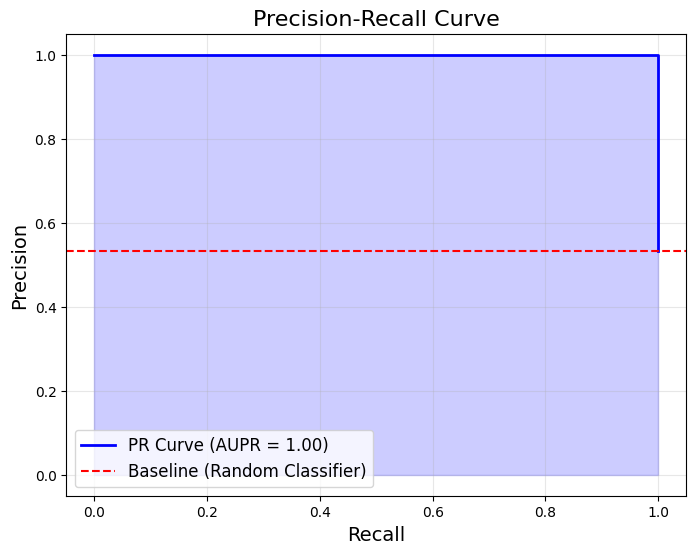

Average Precision (AP): 1.00
Area Under the Precision-Recall Curve (AUPR): 1.00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

# Generate some example data
# True labels (1 for positive, 0 for negative)
y_true = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

# Predicted probabilities for the positive class
y_scores = np.array([0.1, 0.2, 0.8, 0.9, 0.7, 0.3, 0.6, 0.4, 0.75, 0.85, 0.2, 0.15, 0.65, 0.05, 0.95])

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Calculate Average Precision (AP)
average_precision = average_precision_score(y_true, y_scores)

# Calculate AUPR (area under the PR curve)
aupr = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', label=f'PR Curve (AUPR = {aupr:.2f})', color='b', linewidth=2)
plt.fill_between(recall, precision, alpha=0.2, color='b')  # Add shading for better visualization
plt.axhline(y=np.mean(y_true), color='r', linestyle='--', label=f'Baseline (Random Classifier)')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc='lower left', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Print metrics
print(f"Average Precision (AP): {average_precision:.2f}")
print(f"Area Under the Precision-Recall Curve (AUPR): {aupr:.2f}")



In [5]:
import torch
import pickle
import numpy as np
from torch_geometric.data import Data
import pandas as pd
# from sklearn.metrics.pairwise import pairwise_distances
# from arg_parser import parse_args
import os
import yaml

def TEINet_embeddings_5vfold(config_path):
    # args = parse_args()

    with open(config_path) as file:
        config = yaml.safe_load(file)

    with open(config["embeddings_path"], 'rb') as f:
        embedding_dict = pickle.load(f)

    train_file_list = config['StrictTCR']['train_data']['file_list']
    test_file_list = config['StrictTCR']['test_data']['file_list']
    file_path = config['path']

    train_data = []
    for file_name in train_file_list:
        data = pd.read_csv(os.path.join(file_path, file_name))
        train_data.append(data)
    train_data = pd.concat(train_data)


    test_data = []
    for file_name in test_file_list:
        data = pd.read_csv(os.path.join(file_path, file_name))
        test_data.append(data)
    test_data = pd.concat(test_data) 

    all_data = []
    for data in [train_data, test_data]:
        node_index = {} 
        num_nodes = 0
        edge_list = []
        X = []
        y_list = []
        for _, row in data.iterrows():
            label = float(row["Label"])
            nodes = [row["Epitope"], row["CDR3.beta"]]
            for node in nodes:
                if node not in node_index:
                    node_index[node] = num_nodes
                    num_nodes += 1
                    X.append(embedding_dict[node])
            y_list.append(label)
            edge_list.append((node_index[nodes[0]], node_index[nodes[1]]))

        
        X = torch.tensor(np.array(X), dtype=torch.float)
        edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
        y = torch.tensor(y_list, dtype=torch.float)

        all_data.append(Data(x=X, edge_index=edge_index, y=y, num_nodes=num_nodes))

    return all_data


ValueError: 'c' argument has 355416 elements, which is inconsistent with 'x' and 'y' with size 206981.

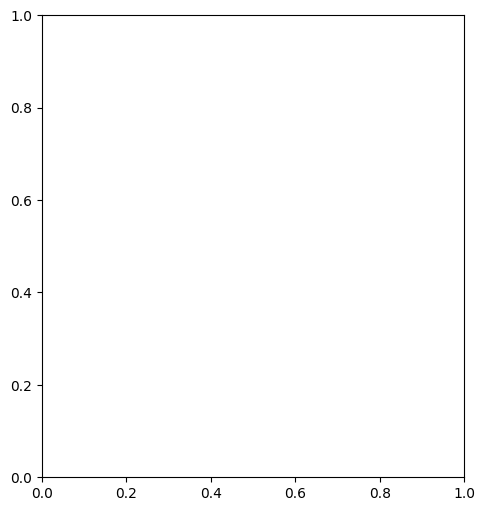

In [7]:
# visualizing embeddings to check if that's the problem for no-learning in training



# import torch
# import torch.nn.functional as F
# from data_processing import TEINet_embeddings_5fold # , esm_embeddings_5fold
# from model import GraphNet
# from sklearn.metrics import roc_auc_score, average_precision_score
# import pandas as pd
# from libauc.losses import AUCMLoss
# from libauc.optimizers import PESG
# from arg_parser import parse_args
# import numpy as np
# import collections
# from torch_geometric.data import Data
import random
# from sklearn.model_selection import train_test_split
# import yaml

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import torch

seed = 18
random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

data_list = TEINet_embeddings_5vfold("./configs/PA_all_gene.yml")
data_list = [data.to(device) for data in data_list]

train_data = data_list[0]
test_data = data_list[1]

# Extract embeddings and labels
train_embeddings = train_data.x.detach().cpu().numpy()  # Convert to NumPy array
train_labels = train_data.y.detach().cpu().numpy()      # Labels as NumPy array

test_embeddings = test_data.x.detach().cpu().numpy()
test_labels = test_data.y.detach().cpu().numpy()

# Combine train and test data for visualization (optional)
embeddings = np.concatenate([train_embeddings, test_embeddings], axis=0)
labels = np.concatenate([train_labels, test_labels], axis=0)

# Option 1: PCA for Dimensionality Reduction
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Option 2: t-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)

# Plot PCA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
plt.title("PCA of Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Class")
plt.grid(True)

# Plot t-SNE results
plt.subplot(1, 2, 2)
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
plt.title("t-SNE of Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Class")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
###### as py file  # train_vanilla.py

In [ ]:
def main():
    precision = "allele" # "allele or gene"
    embed_base_dir = f"../../data_10x/embeddings/paired/{precision}" ### Embeddings!!
    hyperparameter_tuning_with_WnB = True  # False!!

    # -----------------------------------------------------------------------------
    # W&B Setup
    # -----------------------------------------------------------------------------

    experiment_name = f"Experiment - {MODEL_NAME}"
    load_dotenv()
    PROJECT_NAME = os.getenv("MAIN_PROJECT_NAME")
    PROJECT_NAME = f'dataset-{precision}_10x' ## GNN
    print(f"PROJECT_NAME: {PROJECT_NAME}")
    run = wandb.init(project=PROJECT_NAME, job_type=f"{experiment_name}", entity="pa_cancerimmunotherapy")
    config = wandb.config

    # -----------------------------------------------------------------------------
    # data (from W&B)
    # -----------------------------------------------------------------------------
    # Download corresponding artifact (= dataset) from W&B
    dataset_name = f"paired_{precision}"  # beta_
    artifact = run.use_artifact(f"{dataset_name}:latest")
    data_dir = artifact.download(f"./WnB_Experiments_Datasets/paired_{precision}") ## auch.. hier beta
    
    train_file_path = f"{data_dir}/{precision}/train.tsv"
    test_file_path = f"{data_dir}/{precision}/test.tsv"
    val_file_path = f"{data_dir}/{precision}/validation.tsv"

    df_train = pd.read_csv(train_file_path, sep="\t")
    df_test = pd.read_csv(test_file_path, sep="\t")
    df_val = pd.read_csv(val_file_path, sep="\t")
    df_full = pd.concat([df_train, df_test, df_val])

    # Überprüfen, ob es NaN-Werte gibt
    nan_counts = df_full.isna().sum()
    print("Anzahl NaN-Werte pro Spalte:\n", nan_counts)
    
    # Zeilen mit NaN-Werten anzeigen
    rows_with_nans = df_full[df_full.isna().any(axis=1)]
    print("Zeilen mit NaN-Werten:\n", rows_with_nans)
    
    # NaN-Werte in der Spalte 'TRA_CDR3' zählen
    nan_tra_cdr3 = df_full["TRA_CDR3"].isna().sum()
    print(f"Anzahl NaN-Werte in TRA_CDR3: {nan_tra_cdr3}")
    
    # Zeilen mit NaN-Werten in 'TRA_CDR3' anzeigen
    rows_with_nan_tra_cdr3 = df_full[df_full["TRA_CDR3"].isna()]
    print("Zeilen mit NaN-Werten in TRA_CDR3:\n", rows_with_nan_tra_cdr3)

    
    traV_dict = column_to_dictionray(df_full, "TRAV")
    traJ_dict = column_to_dictionray(df_full, "TRAJ")
    trbV_dict = column_to_dictionray(df_full, "TRBV")
    trbJ_dict = column_to_dictionray(df_full, "TRBJ")
    mhc_dict = column_to_dictionray(df_full, "MHC")           
    
    traV_embed_len = get_embed_len(df_full, "TRAV")
    traJ_embed_len = get_embed_len(df_full, "TRAJ")
    trbV_embed_len = get_embed_len(df_full, "TRBV")
    trbJ_embed_len = get_embed_len(df_full, "TRBJ")
    mhc_embed_len = get_embed_len(df_full, "MHC")

    print("erster Stopp")
    train_dataset = PairedVanilla(train_file_path, embed_base_dir, traV_dict, traJ_dict, trbV_dict, trbJ_dict, mhc_dict)
    print("erster zweiter Stopp")
    #train_dataset.print_sample()
    test_dataset = PairedVanilla(test_file_path, embed_base_dir, traV_dict, traJ_dict, trbV_dict, trbJ_dict, mhc_dict)
    print("erster dritter Stopp")
    #test_dataset.print_sample()
    val_dataset = PairedVanilla(val_file_path, embed_base_dir, traV_dict, traJ_dict, trbV_dict, trbJ_dict, mhc_dict)
    print("zweiter Stopp")
    #val_dataset.print_sample()
    
    SEQ_MAX_LENGTH = max(train_dataset.get_max_length(), test_dataset.get_max_length(), val_dataset.get_max_length())
    print(f"this is SEQ_MAX_LENGTH: {SEQ_MAX_LENGTH}")

    pad_collate = PadCollate(SEQ_MAX_LENGTH).pad_collate

    # For reproducability
    generator = torch.Generator().manual_seed(42)
    train_sampler = RandomSampler(train_dataset, generator=generator)
    val_sampler = RandomSampler(val_dataset, generator=generator) 
    test_sampler = SequentialSampler(test_dataset)

    train_dataloader = DataLoader(
        train_dataset,
        batch_size=BATCH_SIZE,
        sampler=train_sampler,
        num_workers=NUM_WORKERS,
        collate_fn=pad_collate,
    )

    val_dataloader = DataLoader(
        val_dataset,
        batch_size=BATCH_SIZE,
        sampler=val_sampler,
        num_workers=NUM_WORKERS,
        collate_fn=pad_collate,

    )

    test_dataloader = DataLoader(
        test_dataset,
        batch_size=1,
        sampler=test_sampler,
        num_workers=NUM_WORKERS,
        collate_fn=pad_collate,
    )
    # ---------------------------------------------------------------------------------
    # model 
    # ---------------------------------------------------------------------------------
    if hyperparameter_tuning_with_WnB:
        hyperparameters = set_hyperparameters(config)
    else:
        hyperparameters = {}
        hyperparameters["optimizer"] = "sgd" #adam
        hyperparameters["learning_rate"] = 5e-3
        hyperparameters["weight_decay"] = 0.075
        hyperparameters["dropout_attention"] = 0.3
        hyperparameters["dropout_linear"] = 0.45
    
    model = VanillaModel(EMBEDDING_SIZE, SEQ_MAX_LENGTH, DEVICE, traV_embed_len, traJ_embed_len, trbV_embed_len, trbJ_embed_len, mhc_embed_len, hyperparameters)
    # ---------------------------------------------------------------------------------
    # training
    # ---------------------------------------------------------------------------------
    # Initialize loggers
    wandb_logger = WandbLogger(project=PROJECT_NAME, name=experiment_name)
    # This logs gradients
    wandb_logger.watch(model)
    tensorboard_logger = TensorBoardLogger("tb_logs", name=f"{MODEL_NAME}")

    # Callbacks
    run_name = wandb.run.name  
    checkpoint_dir = f"checkpoints/{run_name}"
    model_checkpoint = ModelCheckpoint(
        dirpath=checkpoint_dir,
        filename="{epoch:02d}-{val_loss:.2f}",
        monitor="AP_Val",  
        mode="max",
        save_top_k=1  
    )

    early_stopping = EarlyStopping(
        monitor="AP_Val",  
        patience=5,        
        verbose=True,
        mode="max"        
    )

    lr_monitor = LearningRateMonitor(logging_interval="epoch")
    swa = StochasticWeightAveraging(swa_lrs=hyperparameters["learning_rate"]*0.1, swa_epoch_start=45)

    # Training
    trainer = pl.Trainer(
        max_epochs=EPOCHS,
        logger=[wandb_logger, tensorboard_logger],
        callbacks=[model_checkpoint, early_stopping, lr_monitor, swa],  
        accelerator="gpu"
    ) # add mixed precision

    trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)
    best_model_path = model_checkpoint.best_model_path
    print(f"Best model saved at {best_model_path}")
    # Testing
    test_RES = trainer.test(model, dataloaders=test_dataloader)
    print(f"test_RES: {test_RES}")
    validate_RES = trainer.validate(model, dataloaders=val_dataloader)
    print(f"validate_RES: {validate_RES}")
    # Close W&B run
    wandb_logger.experiment.finish()
    # ---------------------------------------------------------------------------------
    # save model
    # ---------------------------------------------------------------------------------
    torch.save(model.state_dict(), MODEL_OUT)
    print(f"Saved PyTorch Model State to {MODEL_OUT}")


if __name__ == '__main__':
    main()

In [5]:
# some investigations on the data we're using for training/testing.  PA_all

paths = []
for i in range(5):
    path = f"processed_data/PA_all/allele_fold_{i}.csv"
    paths.append(path)
for path in paths:
    df=pd.read_csv(path)
    print(path)
    print(f"Length of df: {len(df)}")
    count_ones = (df['Label'] == 1).sum()
    print(f"Percent of positive samples: {count_ones/len(df)}")

processed_data/PA_all/allele_fold_0.csv
Length of df: 78914
Percent of positive samples: 0.5033707580403984
processed_data/PA_all/allele_fold_1.csv
Length of df: 78914
Percent of positive samples: 0.49821324479813467
processed_data/PA_all/allele_fold_2.csv
Length of df: 78914
Percent of positive samples: 0.5012291862027016
processed_data/PA_all/allele_fold_3.csv
Length of df: 78914
Percent of positive samples: 0.5026991408368604
processed_data/PA_all/allele_fold_4.csv
Length of df: 78914
Percent of positive samples: 0.5046633043566414


In [ ]:
# here I should check if the length of the BA train+validation+test == PA_all.
# What does the Kfold method ecxactly?

In [3]:

paths = ["data_for_training/splitted_datasets/allele/beta/train.tsv",
         "data_for_training/splitted_datasets/allele/beta/test.tsv",
         "data_for_training/splitted_datasets/allele/beta/validation.tsv"]
for path in paths:
    df=pd.read_csv(path, sep="\t")
    print(path)
    print(f"Length of df: {len(df)}")
    count_ones = (df['Binding'] == 1).sum()
    print(f"Percent of positive samples: {count_ones/len(df)}")
    

data_for_training/splitted_datasets/allele/beta/train.tsv
Length of df: 279012
Percent of positive samples: 0.5004981864579301
data_for_training/splitted_datasets/allele/beta/test.tsv
Length of df: 59798
Percent of positive samples: 0.5004347971504064
data_for_training/splitted_datasets/allele/beta/validation.tsv
Length of df: 59771
Percent of positive samples: 0.5006106640343979


In [4]:
# Let's check the number of samples in pMTnet, what we used to replicate the results of the paper.

paths = ["processed_data/pMTnet/StrictTCR/StrictTCR_fold_0.csv",
        "processed_data/pMTnet/StrictTCR/StrictTCR_fold_1.csv",
        "processed_data/pMTnet/StrictTCR/StrictTCR_fold_2.csv",
        "processed_data/pMTnet/StrictTCR/StrictTCR_fold_3.csv",
        "processed_data/pMTnet/StrictTCR/StrictTCR_fold_4.csv"]
for path in paths:
    df=pd.read_csv(path)
    print(path)
    print(f"Length of df: {len(df)}")
    count_ones = (df['Label'] == 1).sum()
    print(f"Percent of positive samples: {count_ones/len(df)}")

processed_data/pMTnet/StrictTCR/StrictTCR_fold_0.csv
Length of df: 69003
Percent of positive samples: 0.09090909090909091
processed_data/pMTnet/StrictTCR/StrictTCR_fold_1.csv
Length of df: 68629
Percent of positive samples: 0.09090909090909091
processed_data/pMTnet/StrictTCR/StrictTCR_fold_2.csv
Length of df: 68244
Percent of positive samples: 0.09090909090909091
processed_data/pMTnet/StrictTCR/StrictTCR_fold_3.csv
Length of df: 68772
Percent of positive samples: 0.09090909090909091
processed_data/pMTnet/StrictTCR/StrictTCR_fold_4.csv
Length of df: 68585
Percent of positive samples: 0.09090909090909091


In [ ]:
# discovering

In [2]:
# what's the difference between allele and gene in terms of cdr.3 and epitopes?
path_allele_training = "data_for_training/splitted_datasets/allele/beta/train.tsv"
path_gene_training = "data_for_training/splitted_datasets/gene/beta/train.tsv"
df_allele = pd.read_csv(path_allele_training, sep='\t')
df_gene = pd.read_csv(path_gene_training, sep='\t')
common_cdrs_count = df_allele['TRB_CDR3'].isin(df_gene['TRB_CDR3']).sum()
common_epitopes_count = df_allele['Epitope'].isin(df_gene['Epitope']).sum()
print( "Length of allele_training: ", len(df_allele),'\n', f"Number of common cdrs: {common_cdrs_count}")
print(f"Number of common epitopes: {common_epitopes_count}")

Number of common cdrs: 274083
Number of common epitopes: 275700


In [6]:
print(len(df_allele))
print(len(df_gene))

279012
251686


In [5]:
# check combinations cdr-epitope


# Create a combination column as tuples
df_allele['combo'] = list(zip(df_allele['TRB_CDR3'], df_allele['Epitope']))
df_gene['combo'] = list(zip(df_gene['TRB_CDR3'], df_gene['Epitope']))

# Check how many combinations in df_A['combo'] are in df_B['combo']
common_combos_count = df_allele['combo'].isin(df_gene['combo']).sum()

print(f"Number of common combinations: {common_combos_count}")

Number of common combinations: 139028


In [ ]:
# from the inspection above raise the question if the splitting allele/gene is necessary, since so many cdr-epitope combinations are present in both datasets.


In [7]:
df_allele.head()

,TCR_name,TRBV,TRBJ,TRB_CDR3,TRBC,Epitope,MHC,Binding,task,combo
0,1,TRBV16*01,TRBJ2-1*01,CASSQSGVGNEQFF,NaN,KLGGALQAK,HLA-A*03:01,1,NaN,"(CASSQSGVGNEQFF, KLGGALQAK)"
1,2,TRBV5-1*01,TRBJ1-4*01,CASSGTGTSAFATNEKLFF,NaN,KLGGALQAK,HLA-A*03:01,1,NaN,"(CASSGTGTSAFATNEKLFF, KLGGALQAK)"
2,3,TRBV27*01,TRBJ1-2*01,CASSPGTGASGYTF,NaN,AVFDRKSDAK,HLA-A*11:01,1,NaN,"(CASSPGTGASGYTF, AVFDRKSDAK)"
3,4,TRBV7-9*01,TRBJ2-1*01,CASSLADGGGYNEQFF,NaN,KLGGALQAK,HLA-A*03:01,1,NaN,"(CASSLADGGGYNEQFF, KLGGALQAK)"
4,5,TRBV7-2*01,TRBJ2-1*01,CASSFAGGSYNEQFF,NaN,RLRAEAQVK,HLA-A*03:01,1,NaN,"(CASSFAGGSYNEQFF, RLRAEAQVK)"
